In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

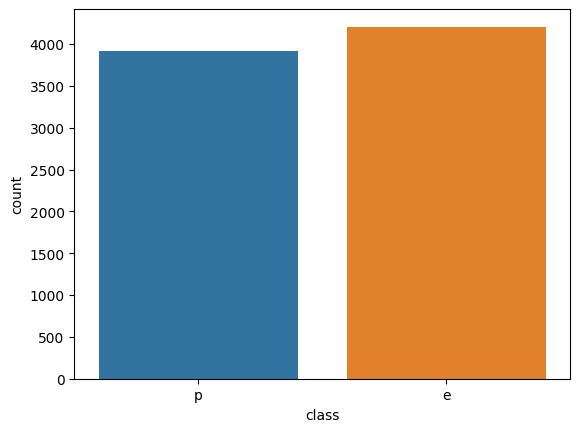

In [3]:
sns.countplot(data = df, x='class', hue='class')

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


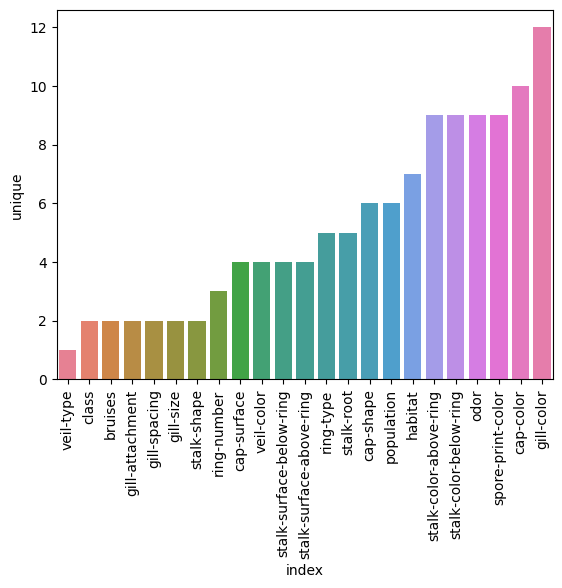

In [7]:
sns.barplot(data = df.describe().transpose().reset_index().sort_values('unique'), x='index', y='unique', hue='index' )
plt.xticks(rotation=90)

plt.show()

In [8]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True).astype(int)
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
model = AdaBoostClassifier(n_estimators=1)

In [13]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [14]:
y_predicted = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [16]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1015,  259],
       [  41, 1123]])

In [17]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           e       0.96      0.80      0.87      1274
           p       0.81      0.96      0.88      1164

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



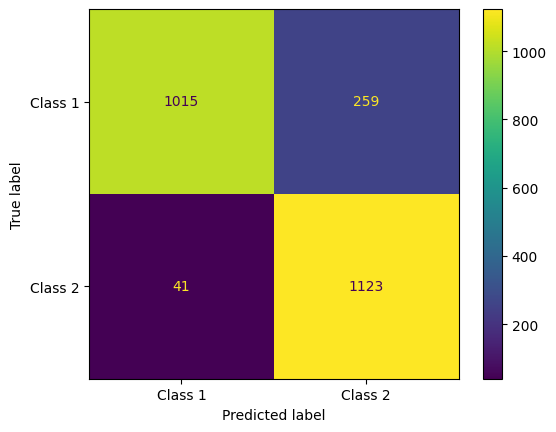

In [18]:
disp = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 2'])
disp.plot()
plt.show()

In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.feature_importances_.argmax()

np.int64(22)

In [21]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

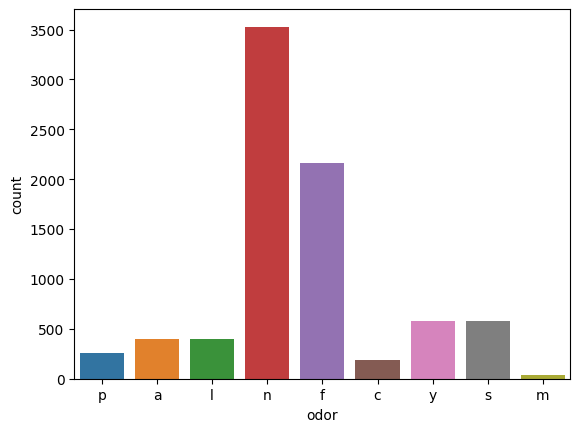

In [22]:
sns.countplot(data=df, x='odor', hue='odor')

In [43]:
len(X.columns)

95

In [24]:
from sklearn.metrics import accuracy_score
error_rates = []

In [26]:
for i in range(1, 96):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_predicted)

    error_rates.append(error)

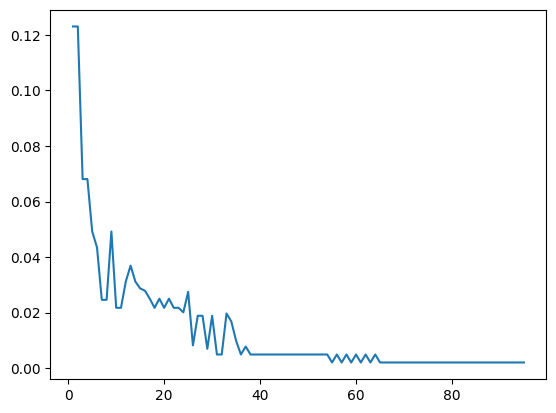

In [28]:
plt.plot(range(1, 96), error_rates)

In [29]:
model

AdaBoostClassifier(n_estimators=95)

In [30]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08510414, 0.1681533 ,
       0.03999727, 0.        , 0.08141   , 0.08411859, 0.01239741,
       0.01236484, 0.        , 0.02050354, 0.05705223, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01659159, 0.        , 0.        , 0.        , 0.        ,
       0.03760245, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02217973, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
feats = pd.DataFrame(index=X.columns, data = model.feature_importances_, columns=['feature_impotances'])
feats

,feature_impotances
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [39]:
imp_feats = feats[feats['feature_impotances'] > 0]
imp_feats.sort_values('feature_impotances')

,feature_impotances
odor_y,0.012365
odor_s,0.012397
spore-print-color_k,0.015784
population_n,0.016584
stalk-shape_t,0.016592
spore-print-color_n,0.018768
gill-spacing_w,0.020504
stalk-color-below-ring_y,0.022180
population_v,0.030373
spore-print-color_u,0.030947


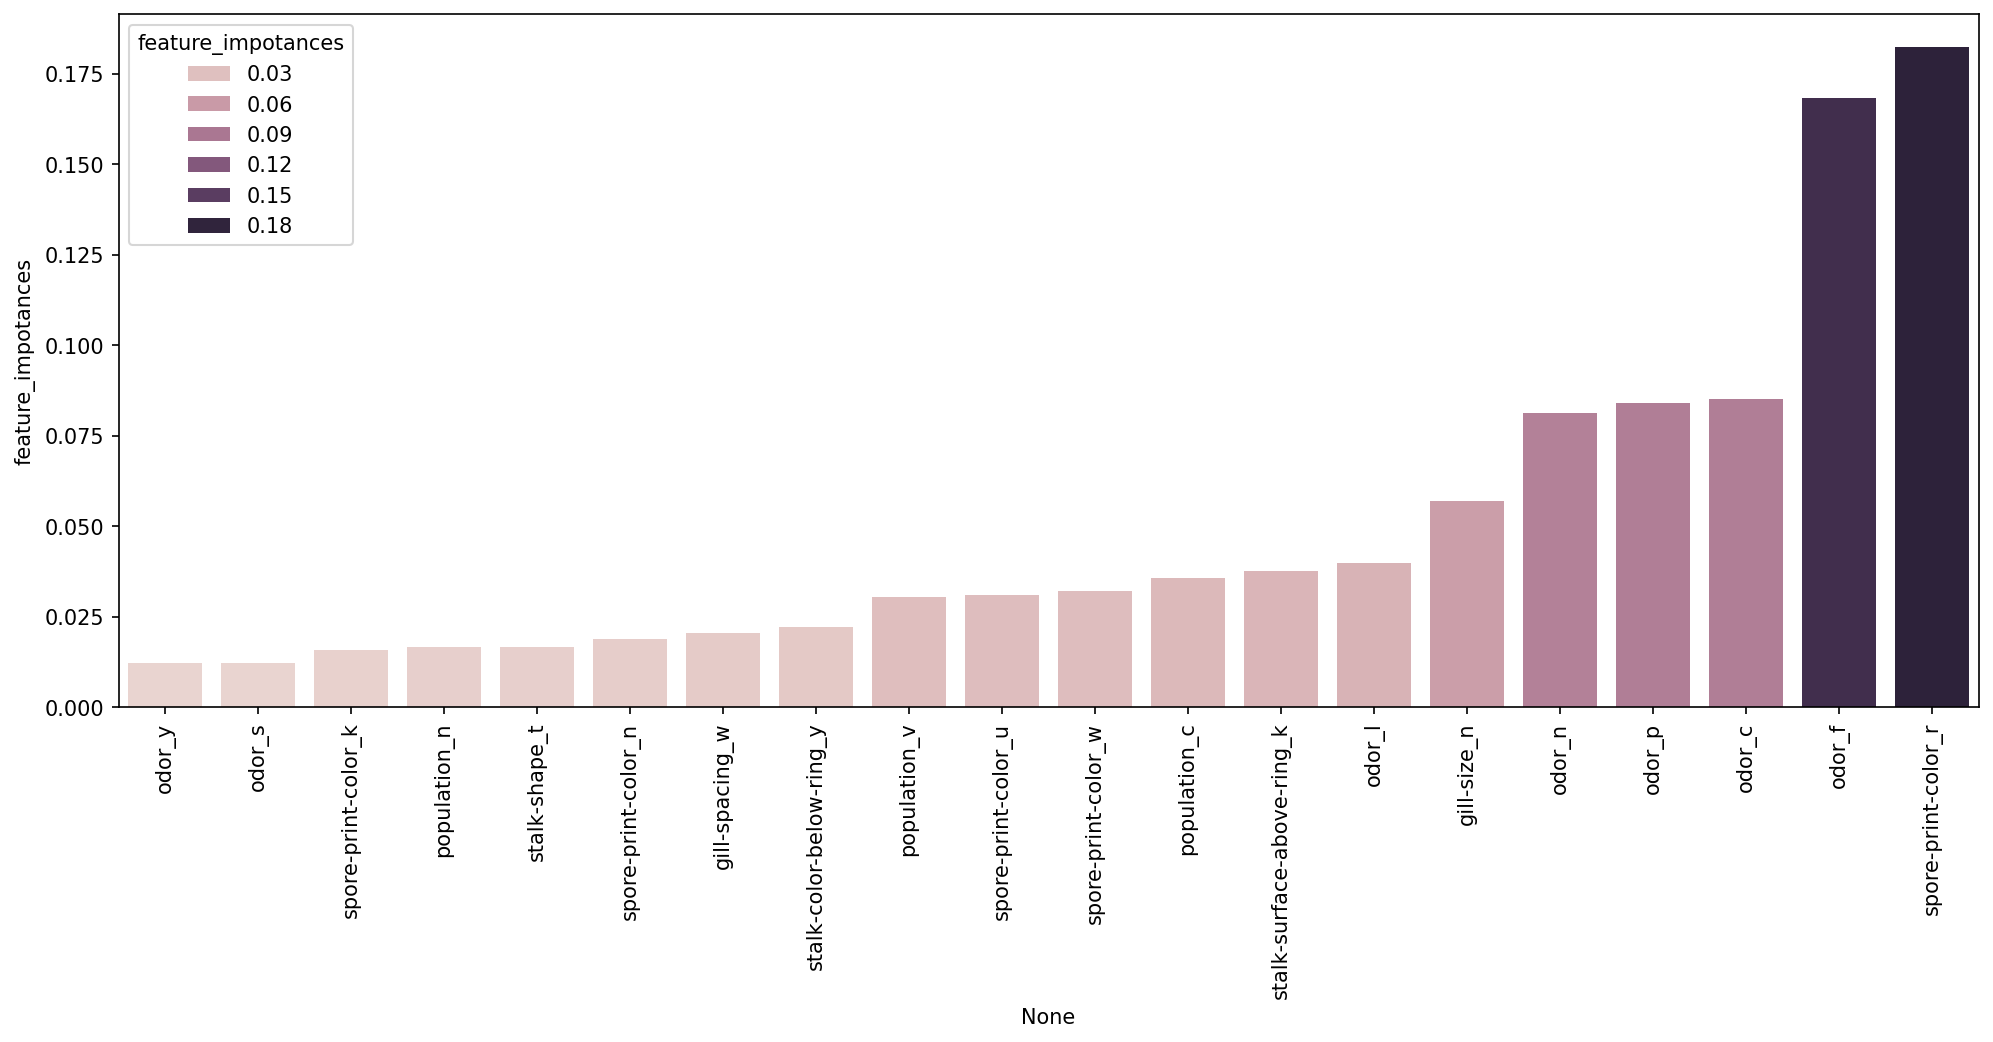

In [47]:
plt.figure(figsize=(16, 6), dpi=150)
sns.barplot(
    data=imp_feats.sort_values('feature_impotances'), 
    x=imp_feats.sort_values('feature_impotances').index, 
    y='feature_impotances', 
    hue='feature_impotances', 

)

plt.xticks(rotation=90)

plt.show()